**Import libraries**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer


import pickle

In [63]:
heart = pd.read_csv('data.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


**Dataset** <br> <br>
**Age**: age in years.<br>
**Sex**: sex (1=male; 0=female).<br>
**Cp**: chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3: asymptomatic).<br>
**Trestbps**: resting blood pressure in mm Hg on admission to the hospital.<br>
**Chol**: serum cholesterol in mg/dl.
fbs: fasting blood sugar > 120 mg/dl (1=true; 0=false).<br>
**Restecg**: resting electrocardiographic results ( 0=normal; 1=having ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy).<br>
**Thalach**: maximum heart rate achieved.
Exang: exercise-induced angina (1=yes; 0=no).<br>
**Oldpeak**: ST depression induced by exercise relative to rest.<br>
**Slope**: the slope of the peak exercise ST segment (0=upsloping; 1=flat; 2=downsloping).<br>
**Ca**: number of major vessels (0–3) colored by fluorosopy.<br>
**Thal**: thalassemia (3=normal; 6=fixed defect; 7=reversable defect).<br>
**Target**: heart disease (1=no, 2=yes).<br>

In [64]:
heart.shape

(270, 14)

In [65]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [66]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [67]:
#checking missing values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
#distribution of outcome variable 'target': '1' means No and '2' means Yes for heart disease.
heart['target'].value_counts()

target
1    150
2    120
Name: count, dtype: int64

In [69]:
#% of patients who have heart disease
heart['target'].value_counts()/heart.shape[0]*100

target
1    55.555556
2    44.444444
Name: count, dtype: float64

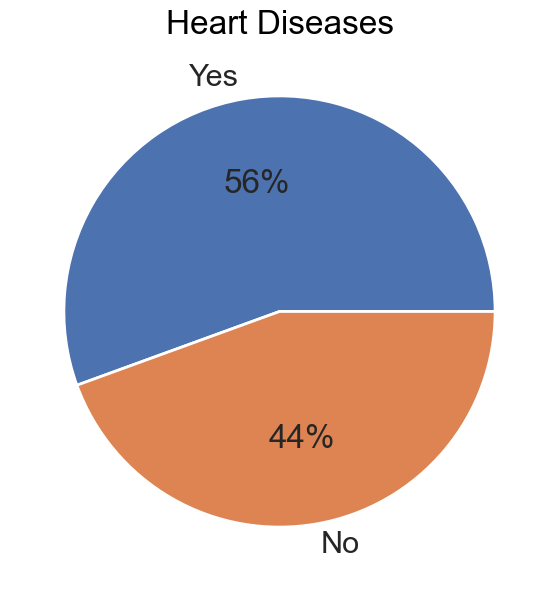

In [70]:
#Pie-chart for visualization of heart disease (1: No, 2: Yes)
labels=['Yes','No']
values=heart['target'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(7,7))
plt.title('Heart Diseases', color="Black")

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

**Age**

In [71]:
# Min, max and average of the age variable
print('Min age: ', min(heart['age']))
print('Max age: ', max(heart['age']))
print('Average age: ', heart['age'].mean())

Min age:  29
Max age:  77
Average age:  54.43333333333333


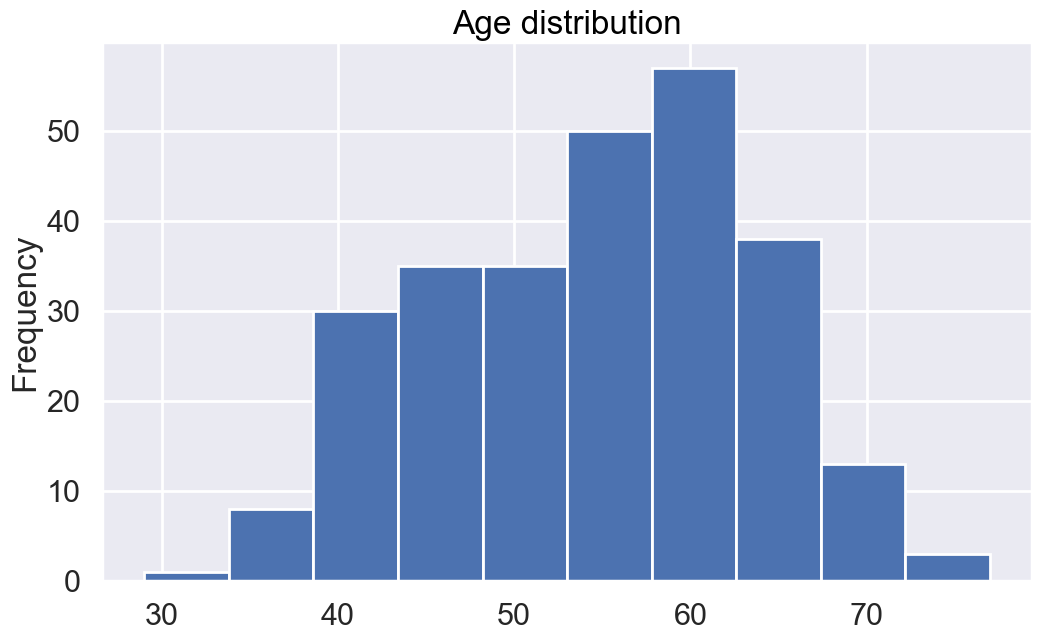

In [72]:
sns.set_theme(context='poster')
plt.figure(figsize=(12,7))
plt.title('Age distribution', color="Black")
heart['age'].plot(kind = 'hist')
plt.show()

In [73]:
#Age distribution for those with and without heart disease

C:\Users\DELL\AppData\Local\Temp\ipykernel_10320\956527740.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['target'] == 1]['age'], label='Do not have heart disease')
c:\Users\DELL\anaconda3\envs\ml_ai\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Temp\ipykernel_10320\956527740.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eit

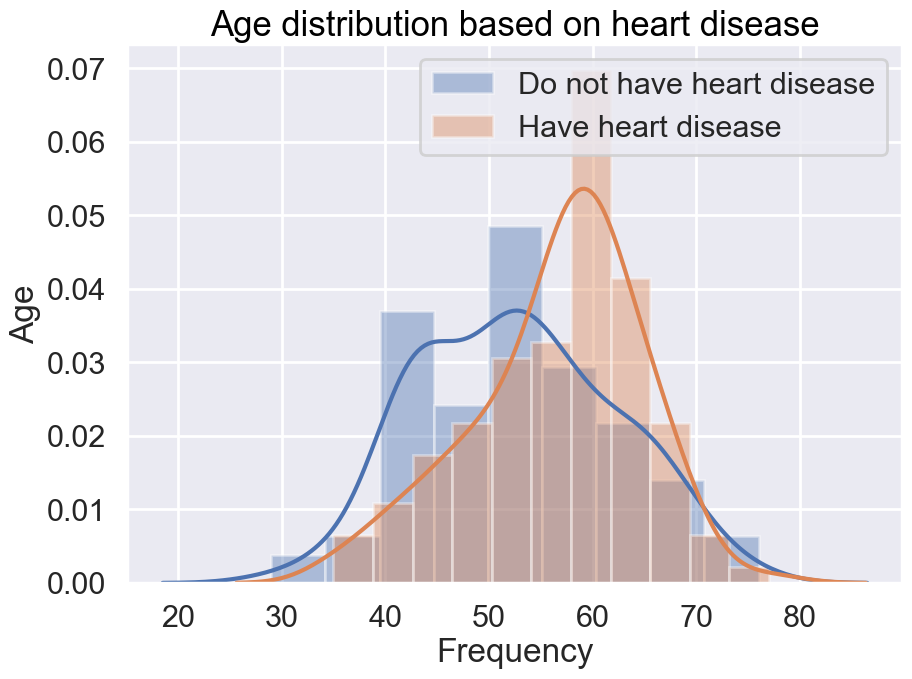

In [74]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)

sns.distplot(heart[heart['target'] == 1]['age'], label='Do not have heart disease')
sns.distplot(heart[heart['target'] == 2]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.legend()
plt.show()

**Gender**

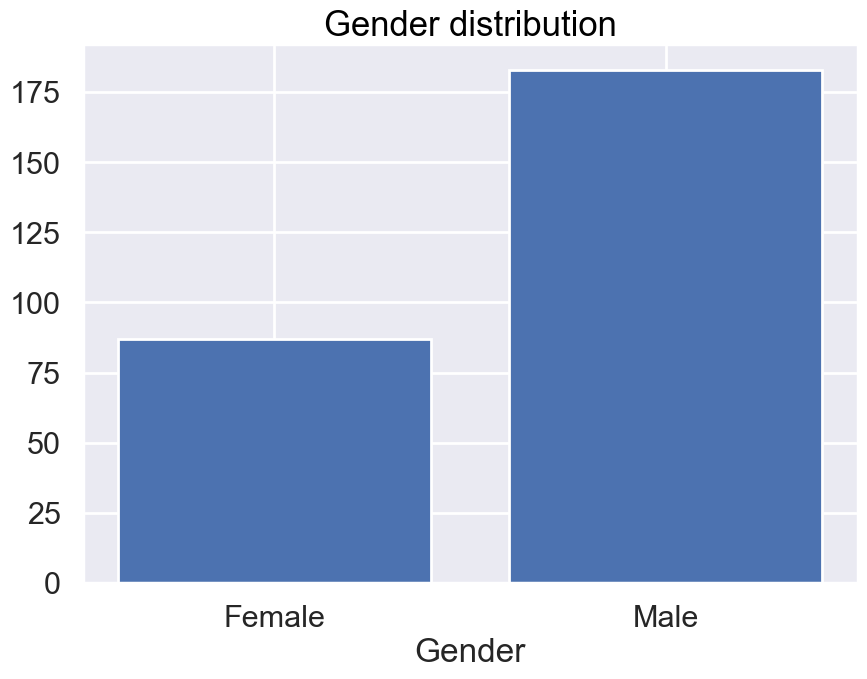

In [75]:
sns.set_theme(context='poster')
# Number of males and females
F = heart[heart['sex'] == 0].count()['target']
M = heart[heart['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (10, 7))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Gender distribution', color="Black",fontsize=25)
plt.show()

**Other variables**
<br>
Chest pain
<br>
Blood pressure
<br>
Cholesterol
<br>
Fasting blood sugar
<br>
Electrocardiographic results
<br>
Maximum heart rate
<br>
Exercise induced angina
<br>
ST depression
<br>
Slope
<br>
Major vessels
<br>
Thalassemia

In [76]:
heart['cp'].value_counts()

cp
4    129
3     79
2     42
1     20
Name: count, dtype: int64

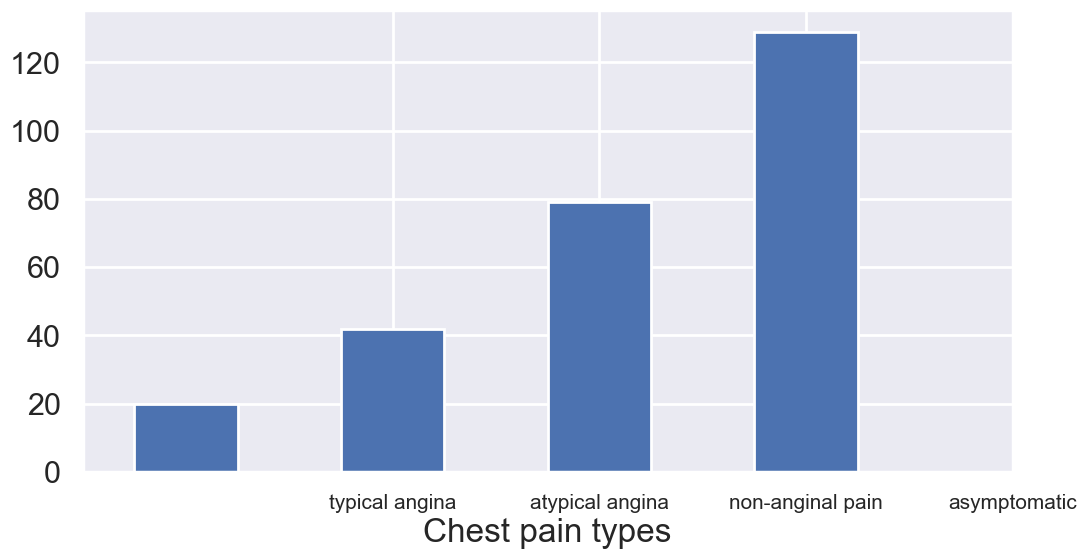

In [77]:
# Chest pain types in bar chart
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
xs =[1,2,3,4]
labels = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']

heart.groupby(heart['cp']).count()['target'].plot(kind = 'bar', figsize = (12, 6))
plt.xlabel('Chest pain types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt. xticks(xs,labels)
plt.show()

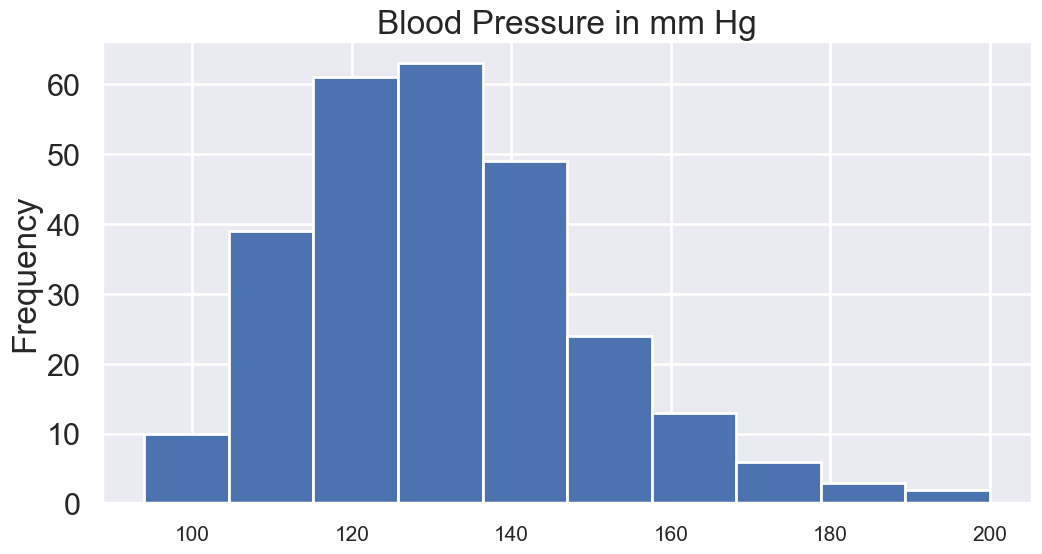

In [78]:
# Blood pressure distribution
heart['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (12, 6))
plt.show()

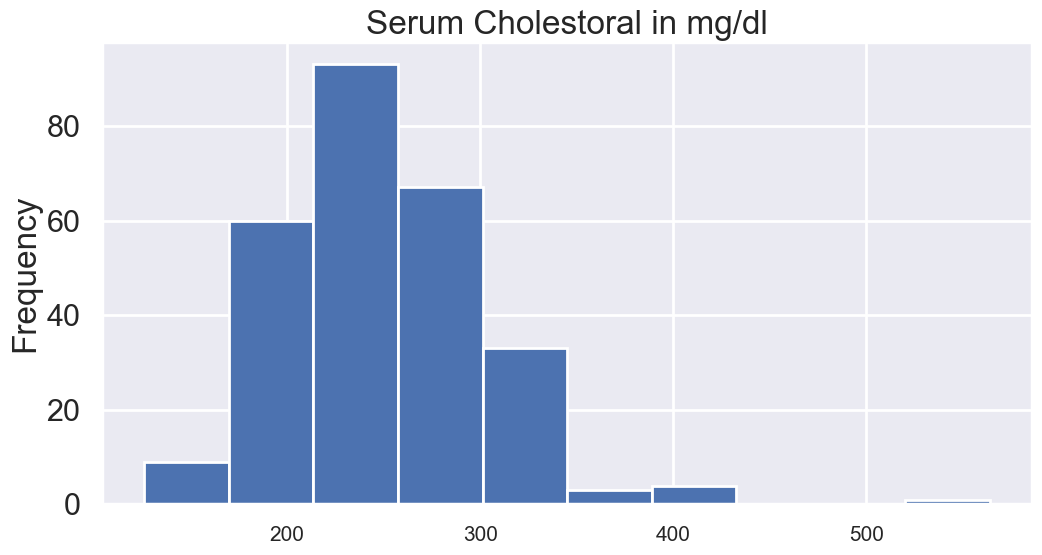

In [79]:
# Display cholestoral distribution
heart['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (12, 6))
plt.show()

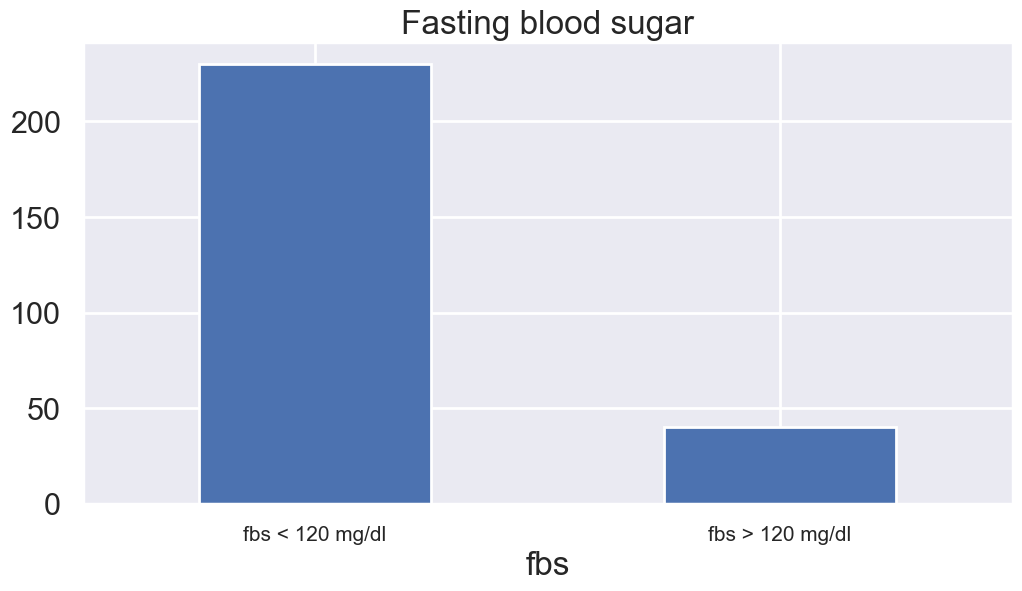

In [80]:
# Display fasting blood sugar in bar chart
heart.groupby(heart['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting blood sugar', figsize = (12, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

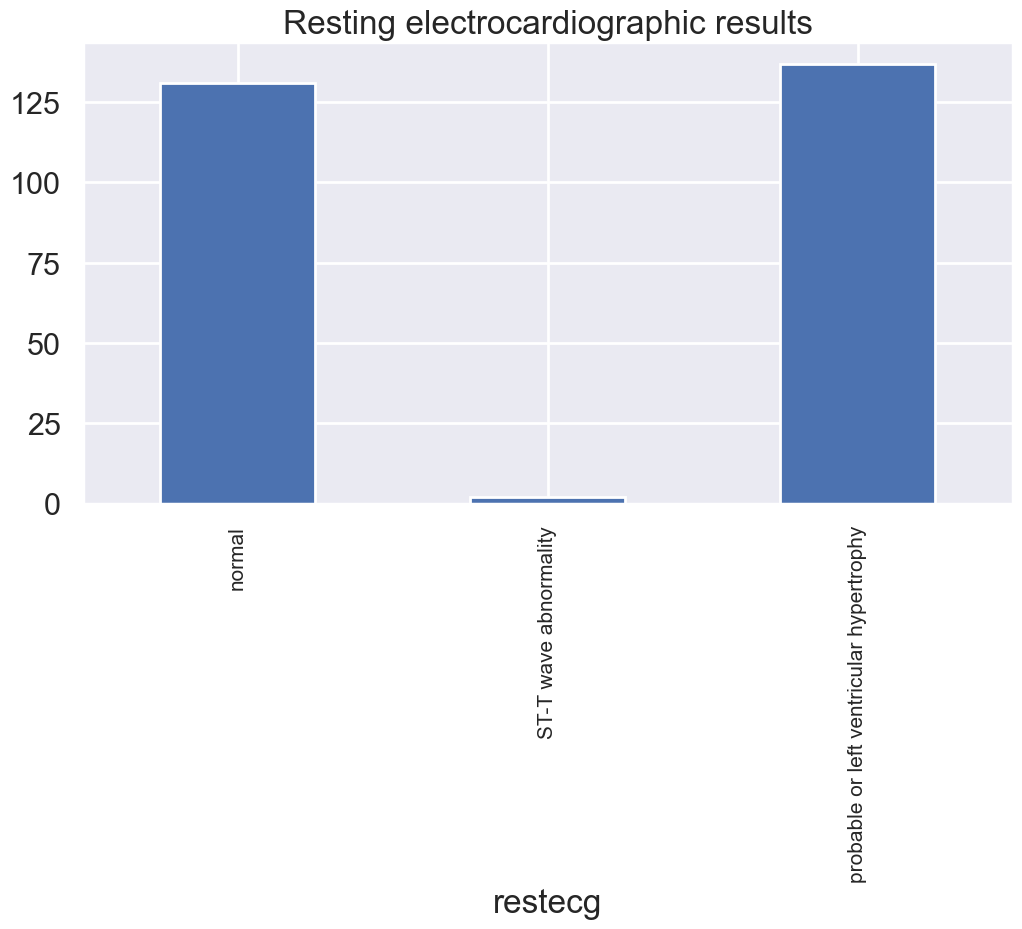

In [81]:
# Display electrocardiographic results in bar chart
heart.groupby(heart['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting electrocardiographic results', figsize = (12, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

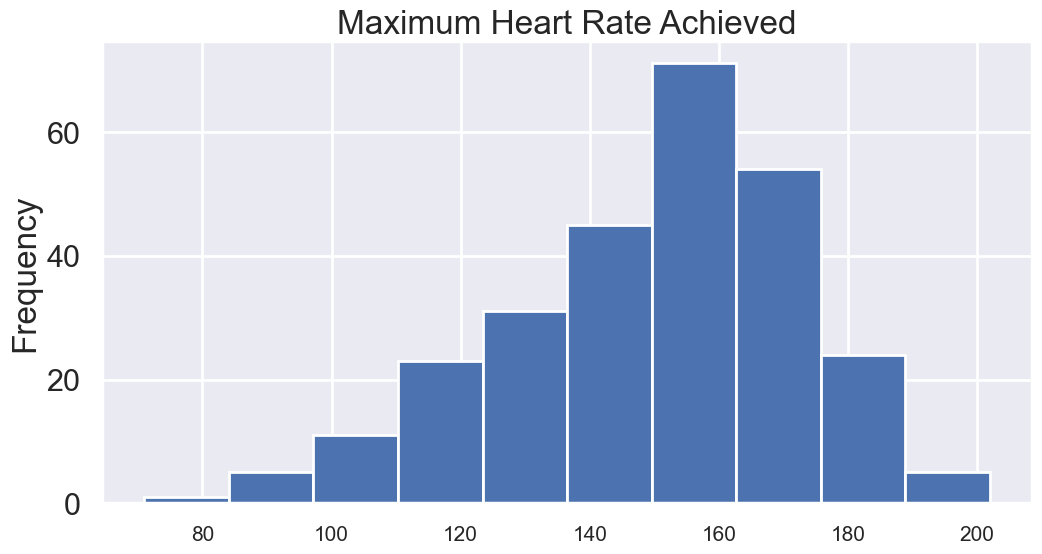

In [82]:
# Display maximum heart rate distribution
heart['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (12, 6))
plt.show()

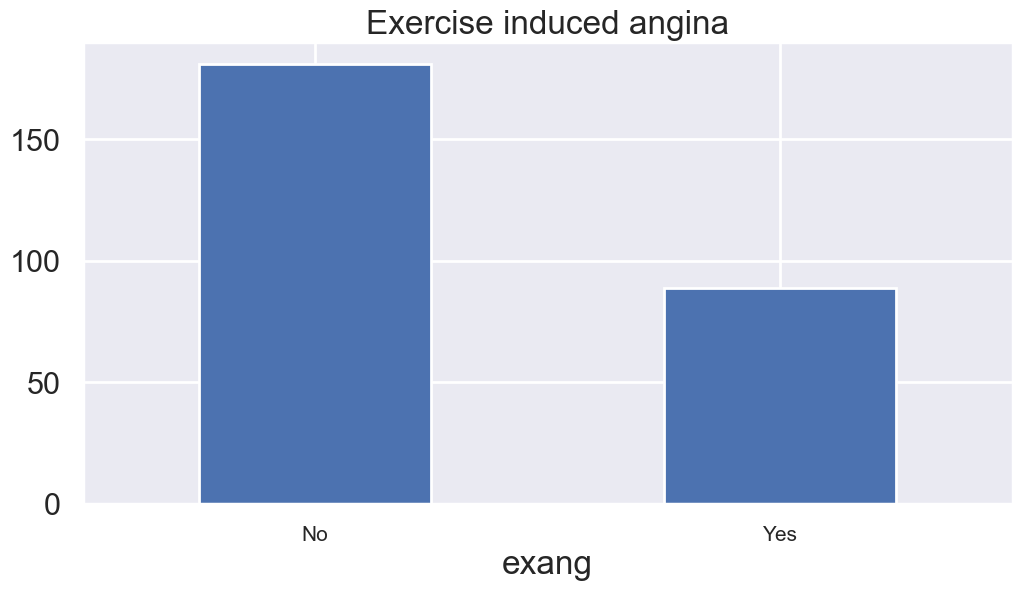

In [83]:
# Display exercise induced angina in bar chart
heart.groupby(heart['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise induced angina',  figsize = (12, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

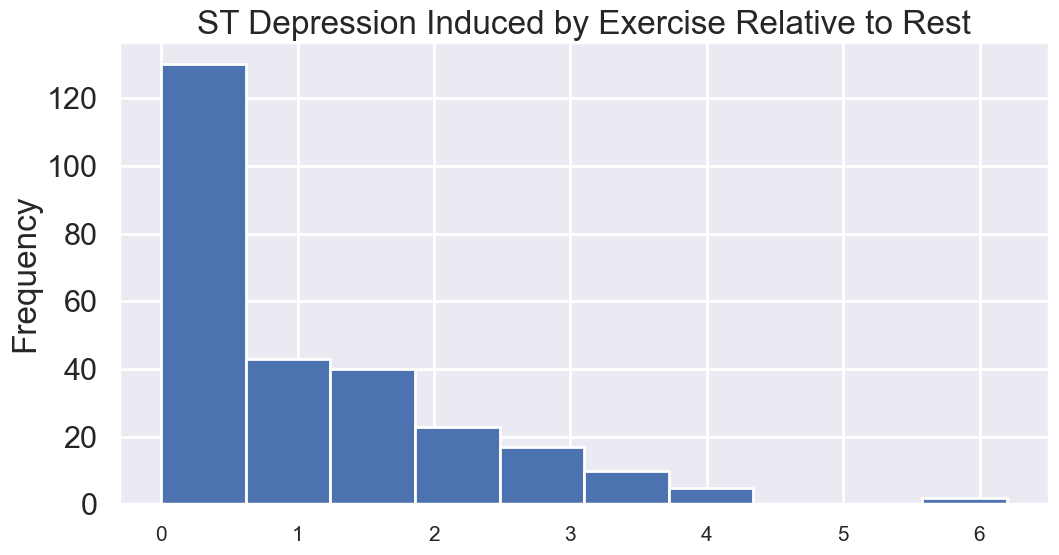

In [84]:
# Display ST depression induced by exercise relative to rest distribution
heart['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (12, 6))
plt.show()

In [85]:
heart['slope'].value_counts()

slope
1    130
2    122
3     18
Name: count, dtype: int64

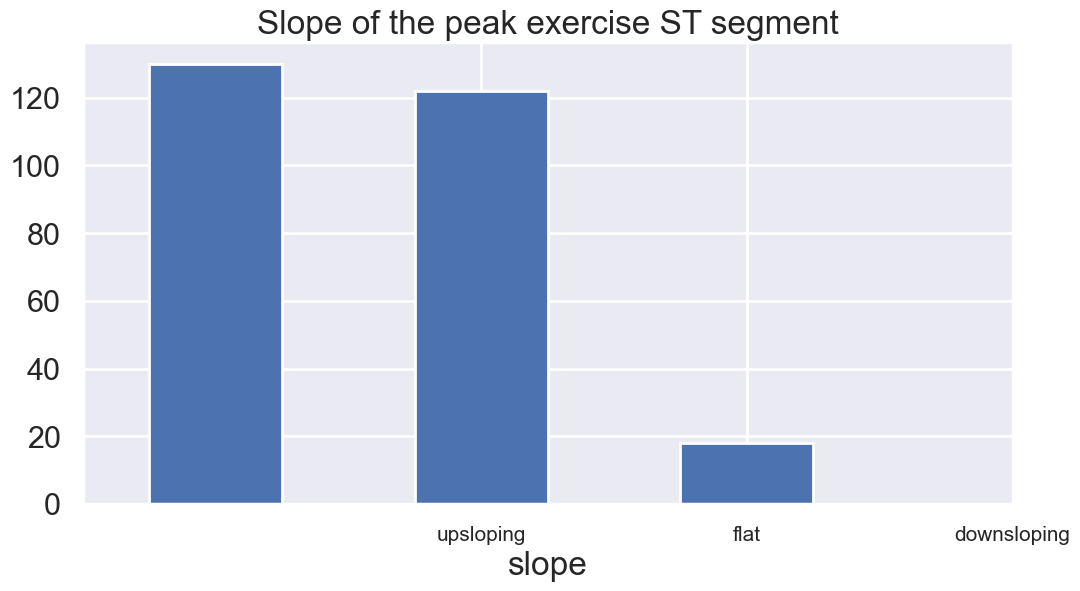

In [86]:
# Display slope of the peak exercise ST segment in bar chart
matplotlib.rc('xtick', labelsize=15) 
xs =[1,2,3]
labels = ['upsloping', 'flat', 'downsloping']

heart.groupby(heart['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the peak exercise ST segment', figsize = (12, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt. xticks(xs,labels)
plt.show()

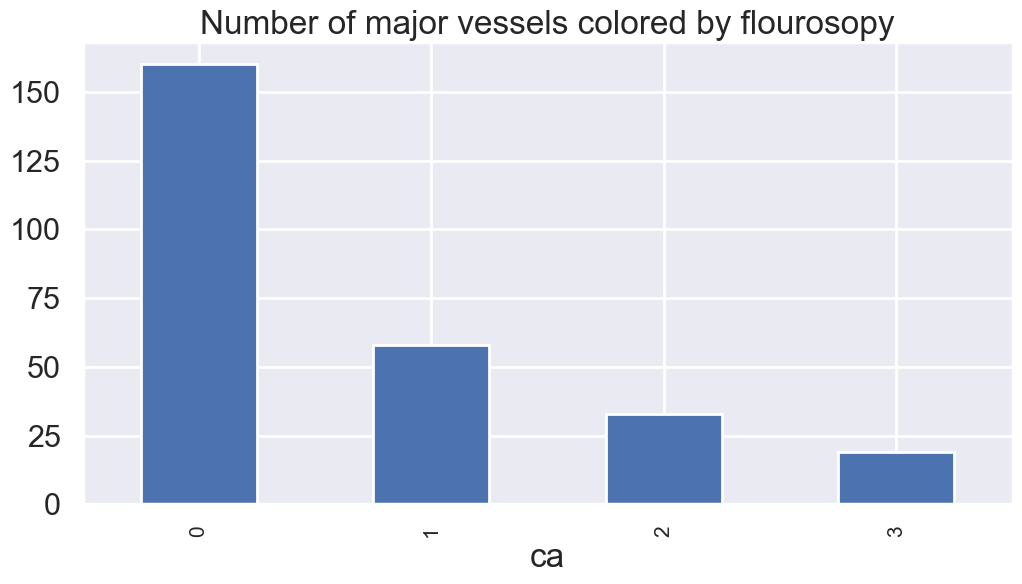

In [87]:
# Display number of major vessels in bar chart
heart.groupby(heart['ca']).count()['target'].plot(kind = 'bar', title = 'Number of major vessels colored by flourosopy', figsize = (12, 6))
plt.show()

In [88]:
heart['thal'].value_counts()

thal
3    152
7    104
6     14
Name: count, dtype: int64

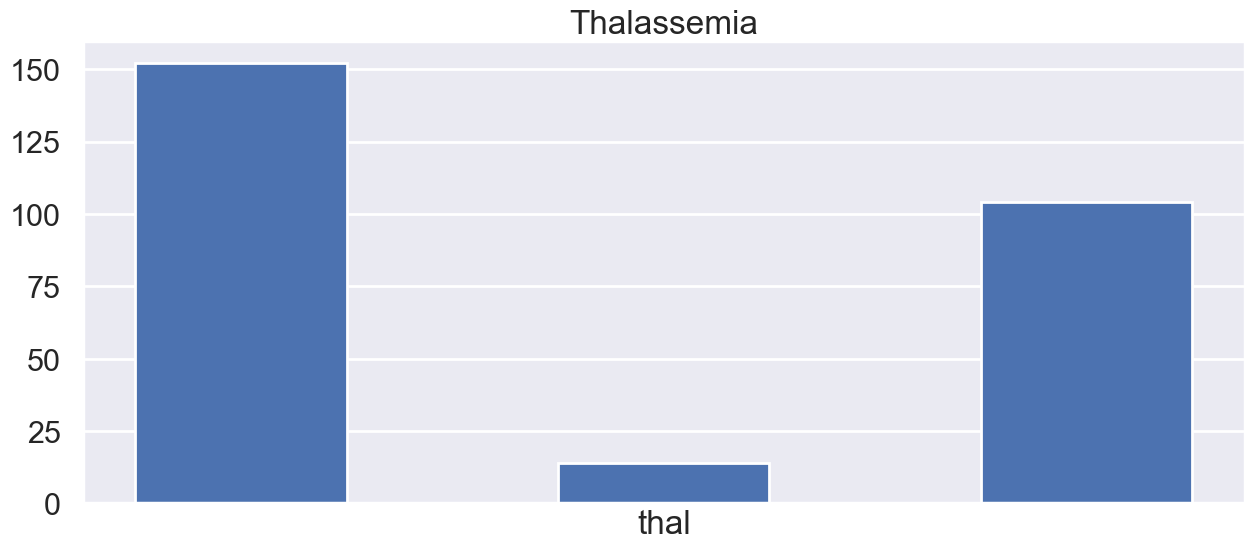

In [89]:
# Display thalassemia in bar chart
matplotlib.rc('xtick', labelsize=12) 
xs =[3,7,6]
labels = ['normal', 'fixed defect', 'reversible defect']

heart.groupby(heart['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia', figsize=(15,6))
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.xticks(xs,labels)
plt.autoscale(enable=True)
plt.show()

## Model development

In [90]:
# Initialize data and target
target = heart['target']
features = heart.drop(['target'], axis = 1)

In [91]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [92]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [93]:
# Initialize the models
rf = RandomForestClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [rf]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [94]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54


confusion_matrix :
[[22  8]
 [ 7 17]]

-----



In [95]:
# Initialize the model
rf = RandomForestClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [rf]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

> Based on the results presented above,I am happy to pick gradient boosting classifier for further development.

Feature: age, Score: 0.08904
Feature: sex, Score: 0.02686
Feature: cp, Score: 0.15669
Feature: trestbps, Score: 0.06463
Feature: chol, Score: 0.08342
Feature: fbs, Score: 0.00664
Feature: restecg, Score: 0.02086
Feature: thalach, Score: 0.11313
Feature: exang, Score: 0.04436
Feature: oldpeak, Score: 0.12382
Feature: slope, Score: 0.05124
Feature: ca, Score: 0.10769
Feature: thal, Score: 0.11162


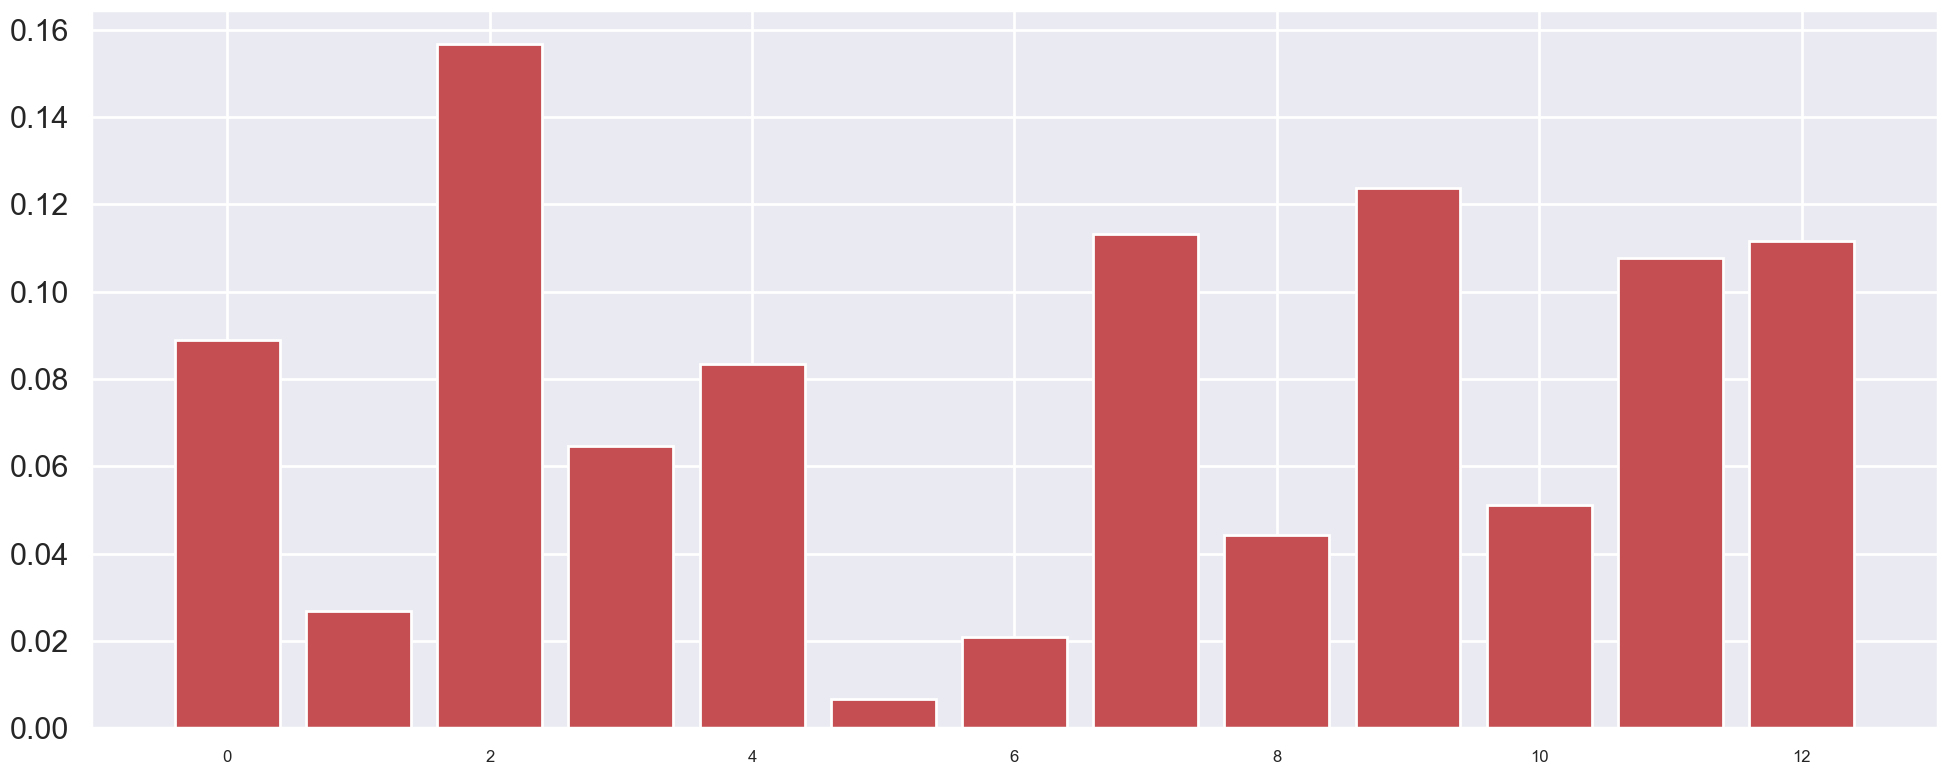

In [96]:
#  Get the important features 
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance, color='r')
plt.tight_layout()
plt.show()

In [97]:
#  Save the model as serialized object pickle
with open('model_heart.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [98]:
import joblib
model = joblib.load('model_heart.pkl')

# Inspect the model attributes
print(model)

RandomForestClassifier(random_state=1)


In [99]:
model.predict(np.array(X_train.iloc[10, :]).reshape(1, -1))

c:\Users\DELL\anaconda3\envs\ml_ai\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [100]:
model.predict_proba(np.array(X_train.iloc[10, :]).reshape(1, -1))[0][1]

c:\Users\DELL\anaconda3\envs\ml_ai\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.03

In [101]:
print(model.feature_importances_)

[0.08904094 0.02686394 0.15668648 0.06462543 0.08342396 0.00664292
 0.0208645  0.11313075 0.0443558  0.12381514 0.05124    0.10768569
 0.11162446]
